In [14]:
%pylab inline
import biff
from octopus import *
from pygadgetreader import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [15]:
## Code taken from (https://github.com/adrn/biff/blob/master/notebooks/Plummer%20test.ipynb)
def STnlm(xyz, mass, rs, n_max, l_max):
    nmax = n_max
    lmax = l_max

    Snlm = np.zeros((nmax+1,lmax+1,lmax+1))
    Tnlm = np.zeros((nmax+1,lmax+1,lmax+1))

    nlms = []

    for n in range(nmax+1):
        for l in range(lmax+1):
            for m in range(l+1):
                nlms.append([n,l,m])

    for nlm in nlms:
        n,l,m = nlm
        S,T = biff.compute_coeffs_discrete(np.double(xyz), np.double(mass/100.0), nlm, rs)
        Snlm[n,l,m] = S
        Tnlm[n,l,m] = T
    return Snlm, Tnlm, nlms

In [8]:
def truncate(pos):
    index_cut = np.where(np.sqrt(pos[:,0]**2.0+pos[:,1]**2.0+pos[:,2]**2.0)<500)[0]
    return pos[index_cut]

In [55]:
MW_sph = readsnap('../data/MW_models/triaxial/spherical_010', 'pos', 'dm')
MW_oblate12 = readsnap('../data/MW_models/triaxial/Oblate12_010', 'pos', 'dm')
MW_oblate15 = readsnap('../data/MW_models/triaxial/Oblate15_010', 'pos', 'dm')
MW_prolate06 = readsnap('../data/MW_models/triaxial/Prolate06_010', 'pos', 'dm')
MW_prolate08 = readsnap('../data/MW_models/triaxial/Prolate08_010', 'pos', 'dm')

In [56]:
MW_sph_t = truncate(MW_sph)
MW_oblate12_t = truncate(MW_oblate12)
MW_oblate15_t = truncate(MW_oblate15)
MW_prolate08_t = truncate(MW_prolate08)
MW_prolate06_t = truncate(MW_prolate06)


r_s = 40.85

In [58]:
Mass = np.ones(len(MW_oblate12_t))
Ssph, Tsph, nlmsph = STnlm(MW_sph_t, Mass, r_s, 20, 0)

In [59]:
Soblate12, Toblate12, nlmso12 = STnlm(MW_oblate12_t, Mass, r_s, 20, 0)
Soblate15, Toblate15, nlmso15 = STnlm(MW_oblate15_t, Mass, r_s, 20, 0)
Sprolate06, Tprolate06, nlmsp06 = STnlm(MW_prolate06_t, Mass, r_s, 20, 0)
Sprolate08, Tprolate08, nlmsp08 = STnlm(MW_prolate08_t, Mass, r_s, 20, 0)


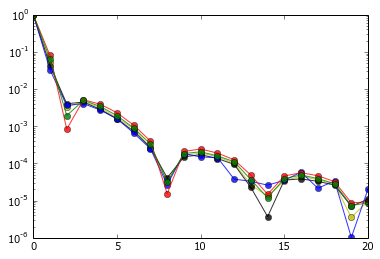

In [61]:
plt.semilogy(np.array(nlmsph)[:,0], np.abs(Ssph.flat/Ssph[0,0,0])[:], marker='o', c='y', alpha=0.8, label='$n=20$')
plt.semilogy(np.array(nlmso12)[:,0], np.abs(Soblate12.flat/Soblate12[0,0,0])[:], marker='o', c='k', alpha=0.8, label='$n=20$')
plt.semilogy(np.array(nlmso15)[:,0], np.abs(Soblate15.flat/Soblate15[0,0,0])[:], marker='o', c='b', alpha=0.8, label='$n=20$')
plt.semilogy(np.array(nlmsp06)[:,0], np.abs(Sprolate06.flat/Sprolate06[0,0,0])[:], marker='o', c='r', alpha=0.8, label='$n=20$')
plt.semilogy(np.array(nlmsp08)[:,0], np.abs(Sprolate08.flat/Sprolate08[0,0,0])[:], marker='o', c='g', alpha=0.8, label='$n=20$')

In [62]:
Ssph_l, Tsph_l, nlmsph_l = STnlm(MW_sph_t, Mass, r_s, 10, 10)

In [33]:
Soblate12_l, Toblate12_l, nlmso12_l = STnlm(MW_oblate12_t, Mass, r_s, 10, 10)

In [47]:
Soblate15_l, Toblate15_l, nlmso15_l = STnlm(MW_oblate15_t, Mass, r_s, 10, 10)


In [48]:
Sprolate06_l, Tprolate06_l, nlmsp06_l = STnlm(MW_prolate06_t, Mass, r_s, 10, 10)
Sprolate08_l, Tprolate08_l, nlmsp08_l = STnlm(MW_prolate08_t, Mass, r_s, 10, 10)

In [53]:
print np.nanmax(Soblate12_l[:,:,:])
print np.nanmax(Soblate15_l[:,:,:])

print np.nanmax(Sprolate06_l[:,:,:])
print np.nanmax(Sprolate08_l[:,:,:])

158890.069247
144648676.592
125096.627711
131415.848338


<matplotlib.colorbar.Colorbar instance at 0x7f74a7447518>

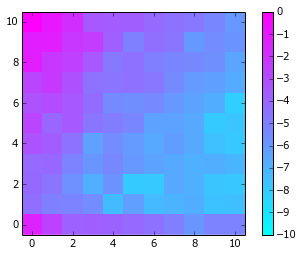

In [64]:
imshow(np.log10(np.abs(Ssph_l[:,:,0]).T / np.nanmax(Ssph_l[:,:,:])), origin='lower', interpolation='None'
           ,cmap = plt.cm.cool, vmin=-10, vmax=0)

colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f74a77e38c0>

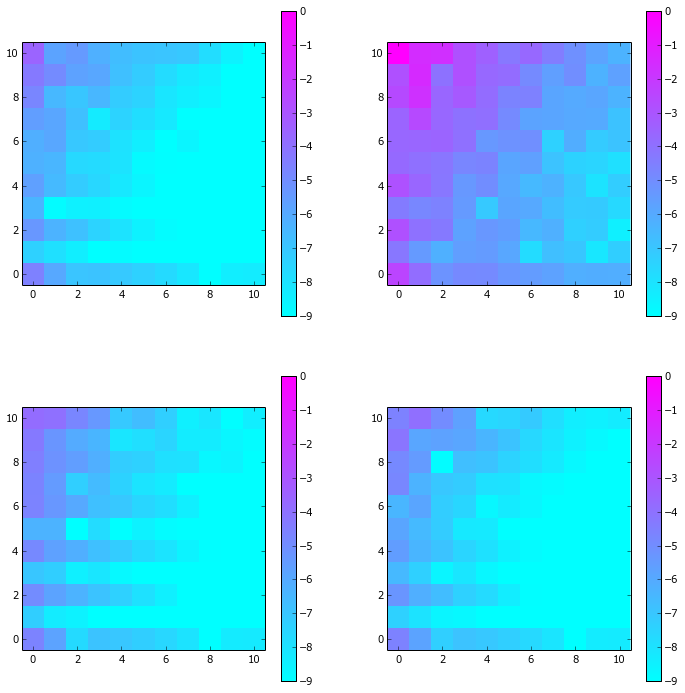

In [54]:
figure(figsize=(12,12))
subplot(2, 2, 1)
imshow(np.log10(np.abs(Soblate12_l[:,:,0]).T / np.nanmax(Soblate15_l[:,:,:])), origin='lower', interpolation='None'
           ,cmap = plt.cm.cool, vmin=-9, vmax=0)
colorbar()

subplot(2, 2, 2)
imshow(np.log10(np.abs(Soblate15_l[:,:,0]).T / np.nanmax(Soblate15_l[:,:,:])), origin='lower', interpolation='None'
           ,cmap = plt.cm.cool, vmin=-9, vmax=0)
colorbar()


subplot(2, 2, 3)
imshow(np.log10(np.abs(Sprolate06_l[:,:,0]).T / np.nanmax(Soblate15_l[:,:,:])), origin='lower', interpolation='None'
           ,cmap = plt.cm.cool, vmin=-9, vmax=0)
colorbar()


subplot(2, 2, 4)
imshow(np.log10(np.abs(Sprolate08_l[:,:,0]).T / np.nanmax(Soblate15_l[:,:,:])), origin='lower', interpolation='None'
           ,cmap = plt.cm.cool, vmin=-9, vmax=0)
colorbar()

